In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np
eda_path_train = '/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_model.csv'
eda_decoded_train = '/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_decoded.csv'
train_df_model = pd.read_csv(eda_path_train)
train_df_decoded = pd.read_csv(eda_decoded_train)
print("Cargado conjunto de entrenamiento. Dimensiones:", train_df_model.shape)
print("Cargado conjunto de entrenamiento. Dimensiones:", train_df_decoded.shape)

Cargado conjunto de entrenamiento. Dimensiones: (30377, 52)
Cargado conjunto de entrenamiento. Dimensiones: (30377, 52)


In [ ]:
def mostrar_columnas(df):
    columnas = df.columns.tolist()
    print("Columnas del dataset:")
    for col in columnas:
        print(f"- {col}")
    return columnas

# Usar la función con tu dataset
columnas_dataset = mostrar_columnas(train_df_model)


Columnas del dataset:
- addtreat_clean_num
- adhd_medicated_num
- adhd_status_num
- conducta_status_num
- ansiedad_status_num
- educacion_especial_status_num
- depresion_status_num
- hcability_num
- bullied_r_num
- k8q31_num
- k8q32_num
- outdoorswkday_clean_num
- sharetoys_clean_num
- outdoorswkend_clean_num
- focuson_clean_num
- screentime_num
- hardwork_clean_num
- sc_english_clean_num
- k7q70_r_num
- calmdown_r_clean_num
- higrade_num
- makefriend_num
- k7q84_r_num
- k4q23_bin
- memorycond_bin
- sc_k2q22_bin
- ace9_bin
- headache_bin
- allergies_bin
- concussion_bin
- k2q40a_bin
- a1_born_bin
- birthwt_l_bin
- autoimmune_bin
- fpl_group_num
- sc_sex_bin
- grades_Mostly A's and B's
- grades_Mostly B's and C's
- grades_Mostly C's and D's
- grades_Mostly D's or lower
- grades_This child's school does not give these grades
- family_r_Other relation
- family_r_Single father
- family_r_Single mother
- family_r_Two biogical/adoptive parents, currently married
- family_r_Two biogical/adopt

# Entrenamiento de modelos

## Arbol de decision - Decision Tree

In [ ]:
#Importacion de librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
#Separación del conjunto de datos
# train_df_model : dataset limpio tras EDA y selección de features. Incluye tanto variables predictoras como variable objetivo

leak_vars = ['addtreat_clean_num', 'adhd_status_num', 'adhd_medicated_num', 'k4q23_bin'] # Lista con variables que presentan correlación excesivamente alta con variable objetivo

x = train_df_model.drop(columns=['k2q31a_bin'] + leak_vars) # Contiene variables objetivas excepto la var. objetivo y las variables con fuga de info.
y = train_df_model['k2q31a_bin']  # Variable objetivo


In [ ]:
# División train/validación (estratificada)
# X_train : Subconjunto de x con el 80% de los datos, para entrenar el modelo.
# X_val : Subconjunto correspondiente de x con el 20% de los datos, para validar (evaluar) el modelo.
# y_train: subconjunto correspondiente de y, con las etiquetas objetivo para los datos de entrenamiento.
# y_val: subconjunto correspondiente de y, con las etiquetas objetivo para los datos de validación
X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 📊 Estadísticas generales del conjunto de entrenamiento
print("\n📊 Información general del conjunto de entrenamiento:")

# Tamaño total
print(f"- Total de muestras: {X_train.shape[0]}")

# Clases de la variable objetivo
train_class_counts = y_train.value_counts()
train_class_percent = y_train.value_counts(normalize=True) * 100

print(f"- Número de casos por clase:")
for label, count in train_class_counts.items():
    pct = train_class_percent[label]
    clase = 'TDAH' if label == 1 else 'No-TDAH'
    print(f"  • {clase}: {count} muestras ({pct:.2f}%)")

# Confirmar desbalance
print(f"- Relación de desbalance (No-TDAH / TDAH): {train_class_counts[0] / train_class_counts[1]:.2f} a 1")

# Dimensiones
print(f"- Número de variables predictoras: {X_train.shape[1]}")
print(f"- Variables: {list(X_train.columns)}")



📊 Información general del conjunto de entrenamiento:
- Total de muestras: 24301
- Número de casos por clase:
  • No-TDAH: 21580 muestras (88.80%)
  • TDAH: 2721 muestras (11.20%)
- Relación de desbalance (No-TDAH / TDAH): 7.93 a 1
- Número de variables predictoras: 47
- Variables: ['conducta_status_num', 'ansiedad_status_num', 'educacion_especial_status_num', 'depresion_status_num', 'hcability_num', 'bullied_r_num', 'k8q31_num', 'k8q32_num', 'outdoorswkday_clean_num', 'sharetoys_clean_num', 'outdoorswkend_clean_num', 'focuson_clean_num', 'screentime_num', 'hardwork_clean_num', 'sc_english_clean_num', 'k7q70_r_num', 'calmdown_r_clean_num', 'higrade_num', 'makefriend_num', 'k7q84_r_num', 'memorycond_bin', 'sc_k2q22_bin', 'ace9_bin', 'headache_bin', 'allergies_bin', 'concussion_bin', 'k2q40a_bin', 'a1_born_bin', 'birthwt_l_bin', 'autoimmune_bin', 'fpl_group_num', 'sc_sex_bin', "grades_Mostly A's and B's", "grades_Mostly B's and C's", "grades_Mostly C's and D's", "grades_Mostly D's or low

In [ ]:
# Lista de variables a eliminar
variables_a_eliminar = [
    'outdoorswkday_clean_num', #
    'sharetoys_clean_num',
    'birth_yr' # tenemos ya sc_age_years
]

# Eliminar columnas del DataFrame
train_df_model.drop(columns=variables_a_eliminar, inplace=True)

# Confirmación
print(f"Variables eliminadas: {variables_a_eliminar}")
print(f"Dimensiones actuales del dataset: {train_df_model.shape}")


Variables eliminadas: ['outdoorswkday_clean_num', 'sharetoys_clean_num', 'birth_yr']
Dimensiones actuales del dataset: (30377, 49)



🔍 Variables seleccionadas por umbral (18): ['conducta_status_num', 'sc_age_years', 'a1_age', 'educacion_especial_status_num', 'hcability_num', 'ansiedad_status_num', 'k7q84_r_num', 'screentime_num', 'fpl_group_num', 'k8q31_num', 'k7q70_r_num', 'allergies_bin', 'bullied_r_num', 'makefriend_num', 'k8q32_num', 'sc_sex_bin', 'outdoorswkday_clean_num', 'family_r_Two biogical/adoptive parents, currently married']
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

✅ Mejores hiperparámetros encontrados:
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

🌱 Features usadas por el árbol (iter 0): 12 -> ['conducta_status_num', 'sc_age_years', 'a1_age', 'educacion_especial_status_num', 'hcability_num', 'ansiedad_status_num', 'k7q84_r_num', 'k8q31_num', 'k7q70_r_num', 'makefriend_num', 'sc_sex_bin', 'outdoorswkday_clean_num']
🔁 Iter 1: 12 features -> ['conducta_status_num', 'sc_age_years', 'a1_age', 'educacion_especial_status_num'

/tmp/ipython-input-232715039.py:171: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


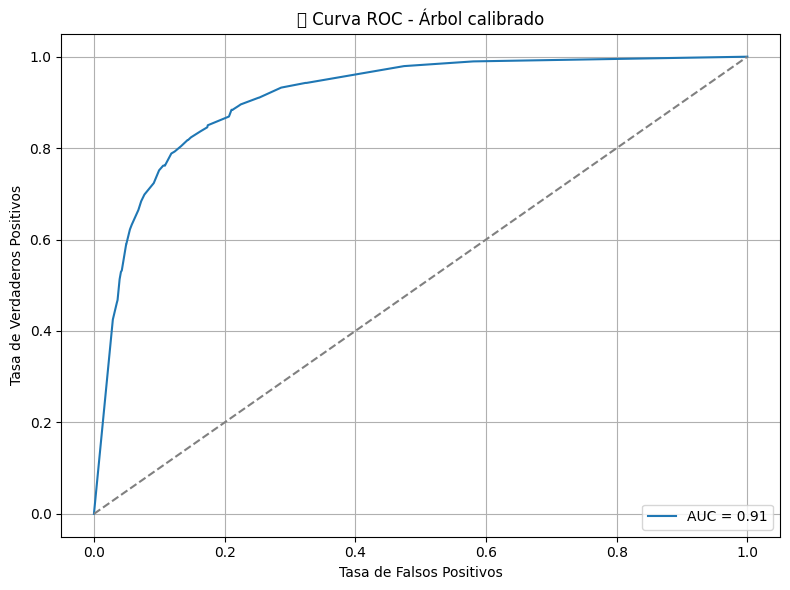

/tmp/ipython-input-232715039.py:186: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


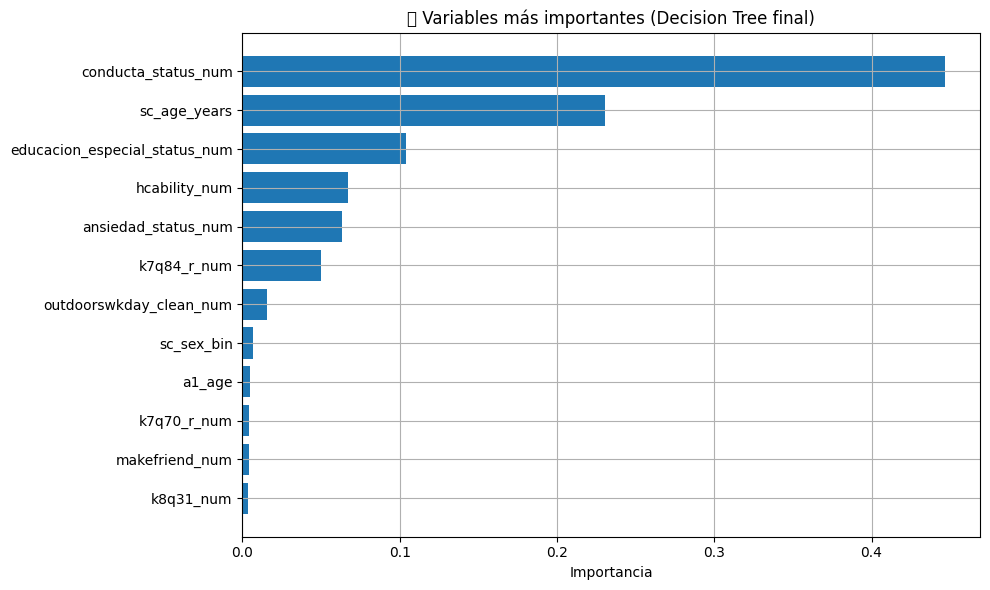

/tmp/ipython-input-232715039.py:201: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


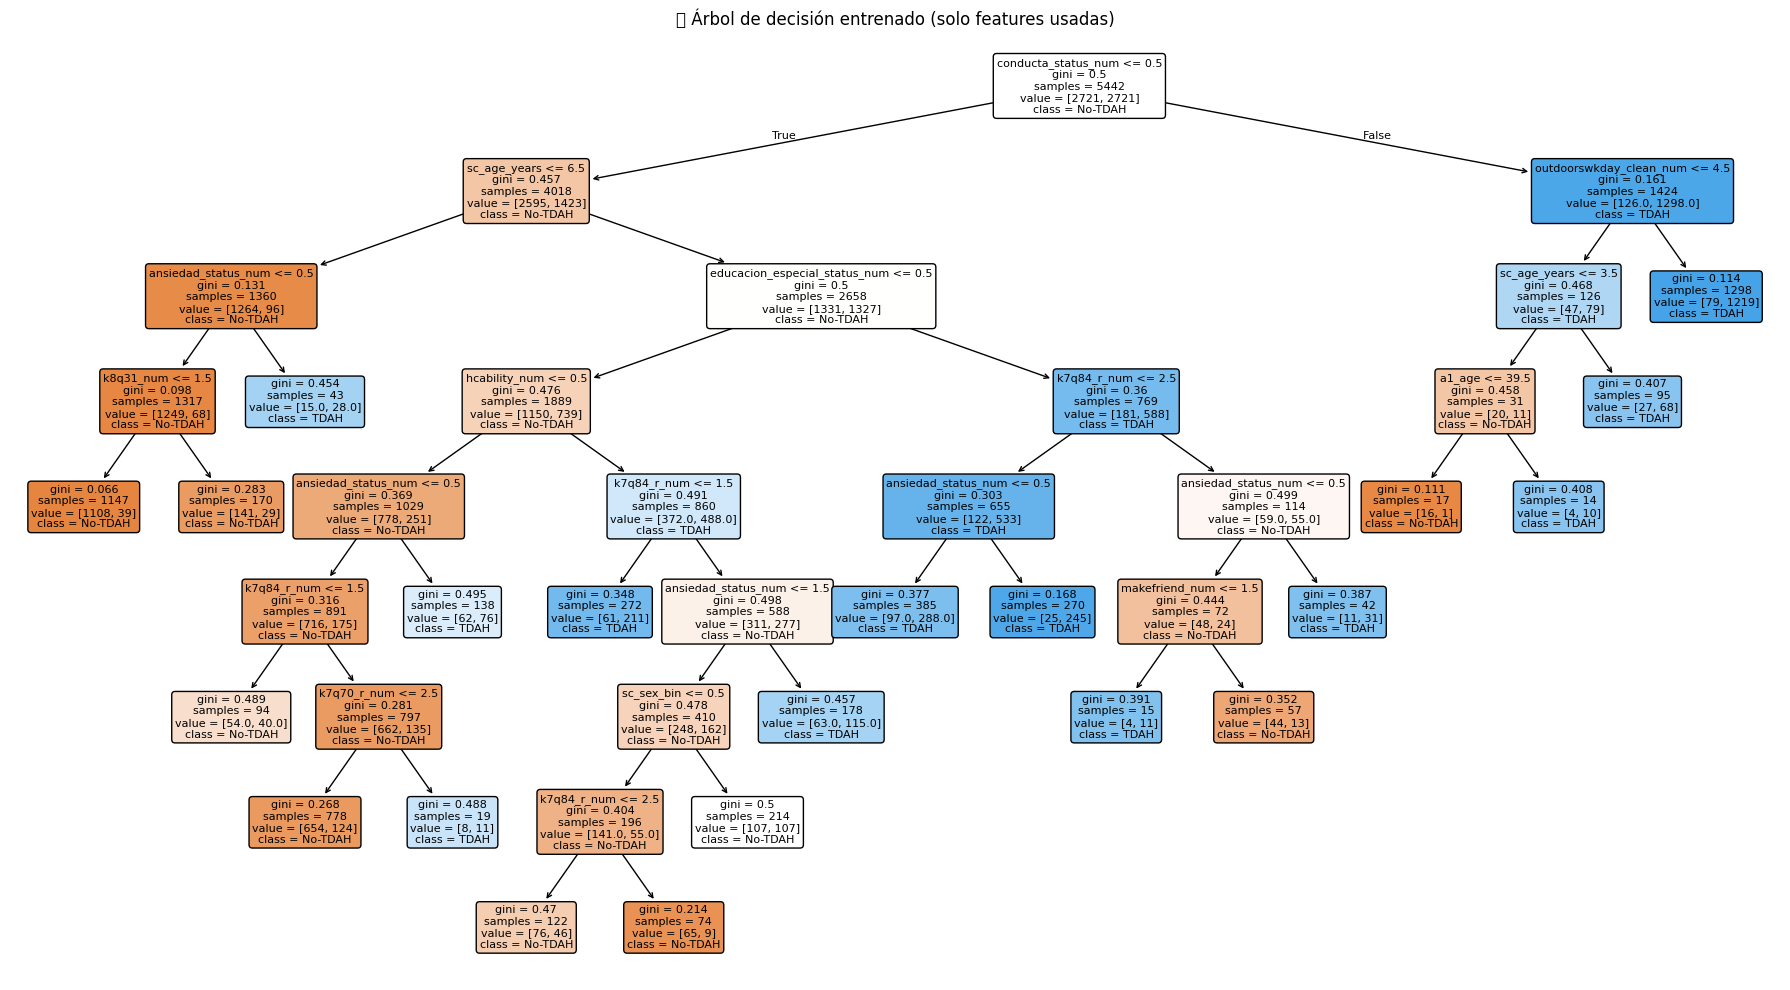


🚀 Umbral óptimo (calibrado): 0.35
Precision: 0.54, Recall: 0.68, F1: 0.61

📊 Informe de clasificación (calibrado + umbral):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5396
           1       0.54      0.68      0.61       680

    accuracy                           0.90      6076
   macro avg       0.75      0.81      0.77      6076
weighted avg       0.91      0.90      0.91      6076


🎯 Evaluación final:
Accuracy: 0.9004
Sensibilidad (Recall, TDAH): 0.6838
Especificidad (No TDAH): 0.9277
NPV (No TDAH): 0.9588
FOR (False Omission Rate): 0.0412
✅ Pipeline con 12 variables guardado correctamente en: /content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/app/modelo_tdahtool_5.pkl


/tmp/ipython-input-232715039.py:282: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(timespec="seconds") + "Z",


✅ metrics_4.json guardado en: /content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/app/metrics_4.json


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    roc_auc_score,
    roc_curve
)
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import json, os
from datetime import datetime

# =========================
# 1) Limpieza y selección previa (tu flujo original)
# =========================

# ❌ Eliminar variables con fuga
leak_vars = ['addtreat_clean_num', 'adhd_status_num', 'adhd_medicated_num', 'memorycond_bin', 'sc_k2q22_bin']
X_train = X_train.drop(columns=leak_vars, errors='ignore')
X_val   = X_val.drop(columns=leak_vars, errors='ignore')

# 👇 NUEVO: eliminar duplicadas/altamente correlacionadas
cols_a_eliminar = ['birth_yr']   # me quedo con sc_age_years
X_train = X_train.drop(columns=cols_a_eliminar, errors='ignore')
X_val   = X_val.drop(columns=cols_a_eliminar, errors='ignore')


# 🔁 Undersampling SOLO en train para el árbol preliminar
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# 📌 Paso previo: selección por importancia con árbol preliminar
prelim_tree = DecisionTreeClassifier(random_state=42)
prelim_tree.fit(X_train_res, y_train_res)

importances_prelim = prelim_tree.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances_prelim
}).sort_values(by='importance', ascending=False)

importance_threshold = 0.01  # ajustable
selected_features = importance_df[importance_df['importance'] > importance_threshold]['feature'].tolist()
print(f"\n🔍 Variables seleccionadas por umbral ({len(selected_features)}): {selected_features}")

# Reducimos datasets a las seleccionadas
X_train = X_train[selected_features]
X_val   = X_val[selected_features]

# Repetimos undersampling con las nuevas variables
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# =========================
# 2) GridSearchCV en el set seleccionado
# =========================

# 🌳 Árbol base
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# 🎯 Scoring personalizado
f1_tdah = make_scorer(f1_score, pos_label=1)
recall_tdah = make_scorer(recall_score, pos_label=1)

# 🧪 Hiperparámetros
param_grid = {
    'max_depth': [8, 10, 12, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'ccp_alpha': [0.0, 0.00001, 0.0001, 0.001, 0.005],
    'criterion': ['gini']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=cv,
    scoring=recall_tdah,  # o f1_tdah si priorizas F1
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_res, y_train_res)
best_params = grid_search.best_params_
print("\n✅ Mejores hiperparámetros encontrados:")
print(best_params)

# =========================
# 3) Opción A: quedarnos SÓLO con las features realmente usadas
#    y reentrenar hasta convergencia
# =========================

def fit_tree_and_get_used_features(params, X_tr_res, y_tr_res, feature_names):
    """Entrena un árbol con params y devuelve las features con importancia>0."""
    tree = DecisionTreeClassifier(**params, random_state=42, class_weight='balanced')
    tree.fit(X_tr_res, y_tr_res)
    used = [f for f, imp in zip(feature_names, tree.feature_importances_) if imp > 0]
    return tree, used

# 3.1 Entrenar con las features actuales y obtener usadas
best_tree_tmp, used_features = fit_tree_and_get_used_features(best_params, X_train_res, y_train_res, X_train.columns)
print(f"\n🌱 Features usadas por el árbol (iter 0): {len(used_features)} -> {used_features}")

# 3.2 Bucle de convergencia (máx. 3 iteraciones)
for it in range(1, 4):
    # Reducir a usadas
    X_train_used = X_train[used_features]
    X_val_used   = X_val[used_features]

    # Rehacer RUS con las usadas
    rus = RandomUnderSampler(random_state=42)
    X_train_res_used, y_train_res_used = rus.fit_resample(X_train_used, y_train)

    # Reentrenar y volver a calcular usadas
    best_tree_tmp, used_features_new = fit_tree_and_get_used_features(best_params, X_train_res_used, y_train_res_used, X_train_used.columns)
    print(f"🔁 Iter {it}: {len(used_features_new)} features -> {used_features_new}")

    if set(used_features_new) == set(used_features):
        print("✅ Convergencia alcanzada en selección de features.")
        break
    used_features = used_features_new

# Tras converger, fijamos los conjuntos definitivos
X_train_used = X_train[used_features]
X_val_used   = X_val[used_features]

rus = RandomUnderSampler(random_state=42)
X_train_res_used, y_train_res_used = rus.fit_resample(X_train_used, y_train)

# Entrenamos el árbol final con las features usadas
best_tree_final = DecisionTreeClassifier(**best_params, random_state=42, class_weight='balanced')
best_tree_final.fit(X_train_res_used, y_train_res_used)

# =========================
# 4) Calibración sobre la distribución original (sin RUS)
# =========================
calibrated_tree = CalibratedClassifierCV(best_tree_final, cv=5)  # método por defecto 'sigmoid'
calibrated_tree.fit(X_train_used, y_train)

# =========================
# 5) Evaluación
# =========================

# Probabilidades calibradas en validación
y_proba = calibrated_tree.predict_proba(X_val_used)[:, 1]
auc_score = roc_auc_score(y_val, y_proba)
print(f"\n📈 AUC-ROC (calibrado): {auc_score:.4f}")

# Curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("📈 Curva ROC - Árbol calibrado")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Importancia de variables (del árbol final)
importances = best_tree_final.feature_importances_
feat_importance_df = pd.DataFrame({
    'feature': used_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
top = min(15, len(feat_importance_df))
plt.barh(feat_importance_df['feature'][:top][::-1], feat_importance_df['importance'][:top][::-1])
plt.xlabel("Importancia")
plt.title("🔍 Variables más importantes (Decision Tree final)")
plt.tight_layout()
plt.grid(True)
plt.show()

# Visualización del árbol
plt.figure(figsize=(18, 10))
plot_tree(
    best_tree_final,
    feature_names=used_features,
    class_names=['No-TDAH', 'TDAH'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("🌳 Árbol de decisión entrenado (solo features usadas)")
plt.tight_layout()
plt.show()

# Umbral óptimo por F1: cálculo robusto
precision_arr, recall_arr, pr_thresholds = precision_recall_curve(y_val, y_proba)
f1_scores_arr = 2 * (precision_arr * recall_arr) / (precision_arr + recall_arr + 1e-10)

# Índice óptimo (evitando out-of-range con thresholds)
optimal_idx = int(np.nanargmax(f1_scores_arr))
if len(pr_thresholds) == 0:
    # Caso degenerado: probas constantes
    optimal_threshold = 0.5
else:
    optimal_idx = min(optimal_idx, len(pr_thresholds) - 1)
    optimal_threshold = pr_thresholds[optimal_idx]

# Predicción final con umbral ajustado
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

# Métricas calculadas directamente (no indexadas en arrays PR)
precision_opt = precision_score(y_val, y_pred_adjusted, pos_label=1, zero_division=0)
recall_opt    = recall_score(y_val, y_pred_adjusted, pos_label=1, zero_division=0)
f1_opt        = f1_score(y_val, y_pred_adjusted, pos_label=1, zero_division=0)

print(f"\n🚀 Umbral óptimo (calibrado): {optimal_threshold:.2f}")
print(f"Precision: {precision_opt:.2f}, Recall: {recall_opt:.2f}, F1: {f1_opt:.2f}")

print("\n📊 Informe de clasificación (calibrado + umbral):")
print(classification_report(y_val, y_pred_adjusted, zero_division=0))

# Métricas personalizadas
cm = confusion_matrix(y_val, y_pred_adjusted, labels=[0, 1])  # asegurar orden
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
accuracy = (tp + tn) / cm.sum() if cm.sum() > 0 else np.nan
npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
for_rate = fn / (fn + tn) if (fn + tn) > 0 else np.nan

print(f"\n🎯 Evaluación final:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensibilidad (Recall, TDAH): {sensitivity:.4f}")
print(f"Especificidad (No TDAH): {specificity:.4f}")
print(f"NPV (No TDAH): {npv:.4f}")
print(f"FOR (False Omission Rate): {for_rate:.4f}")

# =========================
# 6) Pipeline y guardado
# =========================

pipeline = Pipeline([
    ("model", calibrated_tree)
])

output_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/app/modelo_tdahtool_5.pkl'
joblib.dump(pipeline, output_path)
print(f"✅ Pipeline con {len(used_features)} variables guardado correctamente en: {output_path}")

# =========================
# 7) Guardar métricas + orden de features
# =========================

save_dir = '/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/app/'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "metrics_4.json")

metrics = {
    "accuracy": round(float(accuracy), 4),
    "recall_TDAH": round(float(sensitivity), 4),
    "precision_TDAH": round(float(precision_opt), 4),
    "f1_TDAH": round(float(f1_opt), 4),
    "specificity_NoTDAH": round(float(specificity), 4),
    "roc_auc": round(float(auc_score), 4),
    "npv_NoTDAH": round(float(npv), 4),
    "for_NoTDAH": round(float(for_rate), 4),
    "threshold_optimo": round(float(optimal_threshold), 2),
    "supports": {
        "total": int(len(y_val)),
        "TDAH": int((y_val == 1).sum()),
        "NoTDAH": int((y_val == 0).sum())
    },
    "timestamp": datetime.utcnow().isoformat(timespec="seconds") + "Z",
    # Guardamos el orden REAL que espera el modelo
    "features_order": used_features
}

with open(save_path, "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

print("✅ metrics_4.json guardado en:", save_path)



# Evaluación del modelo con Test

In [ ]:
test_df_model = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/test_df_model.csv')


In [ ]:
# Variables eliminadas manualmente
#variables_a_eliminar = ['outdoorswkday_clean_num', 'sharetoys_clean_num', 'birth_yr']
#test_df_model.drop(columns=variables_a_eliminar, inplace=True, errors='ignore')

# Variables con fuga de información
leak_vars = ['addtreat_clean_num', 'adhd_status_num', 'adhd_medicated_num', 'k4q23_bin','memorycond_bin', 'sc_k2q22_bin']
test_df_model.drop(columns=leak_vars, inplace=True, errors='ignore')


In [ ]:
# Separamos en x e y, como con train
X_test = test_df_model.drop(columns=['k2q31a_bin'])
y_test = test_df_model['k2q31a_bin']


In [ ]:
#Seleccion de las variables usadas para el entrenamiento
X_test = X_test[used_features]


In [ ]:
#Prediccion con el modelo calibrado
# Probabilidades calibradas
y_proba_test = calibrated_tree.predict_proba(X_test)[:, 1]

# Predicción con umbral óptimo encontrado en validación
y_pred_test = (y_proba_test >= optimal_threshold).astype(int)

In [ ]:
#Evaluación en el conjunto de test
# Métricas
print("\n📊 Informe de clasificación sobre test (calibrado + umbral):")
print(classification_report(y_test, y_pred_test))

# Curva ROC
auc_test = roc_auc_score(y_test, y_proba_test)
print(f"AUC-ROC (test): {auc_test:.4f}")

# Confusion matrix y métricas personalizadas
# 📋 Métricas personalizadas
cm = confusion_matrix(y_val, y_pred_adjusted, labels=[0, 1])  # 🆕 asegurar orden
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
accuracy = (tp + tn) / cm.sum() if cm.sum() > 0 else np.nan
npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan           # 🆕 NPV
for_rate = fn / (fn + tn) if (fn + tn) > 0 else np.nan      # 🆕 FOR = 1 - NPV

print(f"\n🎯 Evaluación final en TEST:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensibilidad (Recall, TDAH): {sensitivity:.4f}")
print(f"Especificidad (No TDAH): {specificity:.4f}")
print(f"NPV (No TDAH): {npv:.4f}")                           # 🆕
print(f"FOR (False Omission Rate): {for_rate:.4f}")         # 🆕



📊 Informe de clasificación sobre test (calibrado + umbral):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6836
           1       0.54      0.70      0.61       859

    accuracy                           0.90      7695
   macro avg       0.75      0.81      0.78      7695
weighted avg       0.91      0.90      0.91      7695

AUC-ROC (test): 0.9141

🎯 Evaluación final en TEST:
Accuracy: 0.9004
Sensibilidad (Recall, TDAH): 0.6838
Especificidad (No TDAH): 0.9277
NPV (No TDAH): 0.9588
FOR (False Omission Rate): 0.0412


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# === MÉTRICAS VALIDACIÓN ===
precision_val_0 = precision_score(y_val, y_pred_adjusted, pos_label=0)
recall_val_0    = recall_score(y_val, y_pred_adjusted, pos_label=0)
f1_val_0        = f1_score(y_val, y_pred_adjusted, pos_label=0)

precision_val_1 = precision_score(y_val, y_pred_adjusted, pos_label=1)
recall_val_1    = recall_score(y_val, y_pred_adjusted, pos_label=1)
f1_val_1        = f1_score(y_val, y_pred_adjusted, pos_label=1)

# === MÉTRICAS TEST ===
precision_test_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_test_0    = recall_score(y_test, y_pred_test, pos_label=0)
f1_test_0        = f1_score(y_test, y_pred_test, pos_label=0)

precision_test_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_test_1    = recall_score(y_test, y_pred_test, pos_label=1)
f1_test_1        = f1_score(y_test, y_pred_test, pos_label=1)

# === COMPARATIVA FORMATEADA ===
print("\n📊 COMPARATIVA DETALLADA POR CLASE (Validación vs Test):")
print("------------------------------------------------------------")
print("              |  Precision   |   Recall     |   F1-score   ")
print("------------------------------------------------------------")
print(f"Clase 0 (No)  |  {precision_val_0:.4f} (val) |  {recall_val_0:.4f} (val) |  {f1_val_0:.4f} (val)")
print(f"              |  {precision_test_0:.4f} (test)|  {recall_test_0:.4f} (test)|  {f1_test_0:.4f} (test)")
print("------------------------------------------------------------")
print(f"Clase 1 (TDAH)|  {precision_val_1:.4f} (val) |  {recall_val_1:.4f} (val) |  {f1_val_1:.4f} (val)")
print(f"              |  {precision_test_1:.4f} (test)|  {recall_test_1:.4f} (test)|  {f1_test_1:.4f} (test)")
print("------------------------------------------------------------")




📊 COMPARATIVA DETALLADA POR CLASE (Validación vs Test):
------------------------------------------------------------
              |  Precision   |   Recall     |   F1-score   
------------------------------------------------------------
Clase 0 (No)  |  0.9588 (val) |  0.9277 (val) |  0.9430 (val)
              |  0.9606 (test)|  0.9264 (test)|  0.9432 (test)
------------------------------------------------------------
Clase 1 (TDAH)|  0.5439 (val) |  0.6838 (val) |  0.6059 (val)
              |  0.5436 (test)|  0.6973 (test)|  0.6109 (test)
------------------------------------------------------------


/tmp/ipython-input-3871603252.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


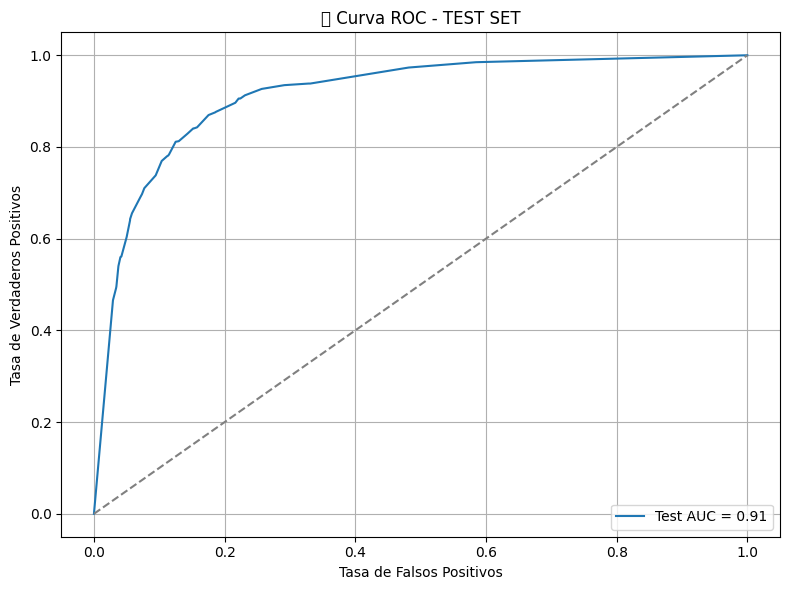

In [ ]:
#Análisis curvas ROC
from sklearn.metrics import roc_curve

fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("📈 Curva ROC - TEST SET")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


##  Comparativa de rendimiento según distintos conjuntos de variables

## 🔍 Comparativa experimental según la selección de variables

En esta sección se analizan tres enfoques distintos para la selección de variables predictoras en el modelo de detección de TDAH:

- **Caso 1**: Modelo entrenado con **todas las variables** tras el preprocesamiento (`train_df_model` completo).
- **Caso 2**: Modelo entrenado únicamente con las **variables propuestas por el experto** (`train_df_expert`).
- **Caso 3**: Modelo entrenado con las **variables seleccionadas por el autor** mediante análisis de importancia (`selected_features`).


Función que encapsula el pipeline de datos para crear el modelo según el dataset

In [ ]:
from sklearn.metrics import precision_score

def entrenar_y_evaluar_modelo(df, nombre_dataset, target='k2q31a_bin'):
    print(f"\n🔁 Ejecutando pipeline para: {nombre_dataset}")

    # Variables con fuga
    leak_vars = ['addtreat_clean_num', 'adhd_status_num', 'adhd_medicated_num', 'memorycond_bin', 'sc_k2q22_bin']
    df = df.drop(columns=[col for col in leak_vars if col in df.columns], errors='ignore')

    X = df.drop(columns=[target])
    y = df[target]

    # División entrenamiento/validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Undersampling
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

    # Selección preliminar
    prelim_tree = DecisionTreeClassifier(random_state=42)
    prelim_tree.fit(X_train_res, y_train_res)

    importances = prelim_tree.feature_importances_
    selected_features = X_train.columns[np.array(importances) > 0.01].tolist()

    X_train = X_train[selected_features]
    X_val = X_val[selected_features]

    # Undersampling de nuevo tras filtrar
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

    # Árbol y tuning
    dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    param_grid = {
        'max_depth': [8, 10, 12, 15, 20, None],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'ccp_alpha': [0.0, 0.00001, 0.0001, 0.001, 0.005],
        'criterion': ['gini']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scorer = make_scorer(recall_score, pos_label=1)

    grid_search = GridSearchCV(dtree, param_grid, cv=cv, scoring=scorer, n_jobs=-1, verbose=0)
    grid_search.fit(X_train_res, y_train_res)

    best_tree = grid_search.best_estimator_

    # Calibración
    calibrated_tree = CalibratedClassifierCV(best_tree, cv=5)
    calibrated_tree.fit(X_train, y_train)

    y_proba = calibrated_tree.predict_proba(X_val)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    optimal_idx = f1_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]

    y_pred = (y_proba >= optimal_threshold).astype(int)

    # Métricas por clase
    report = classification_report(y_val, y_pred, output_dict=True)
    auc = roc_auc_score(y_val, y_proba)
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / cm.sum()

    print(f"\n📋 Resultados para {nombre_dataset}:")
    print(f"🔸 AUC: {auc:.4f}")
    print(f"🔹 Accuracy: {accuracy:.4f}")
    print(f"🔸 Specificity (Clase 0 - No TDAH): {specificity:.4f}")
    print(f"🔹 Clase 0 (No-TDAH) → Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
    print(f"🔹 Clase 1 (TDAH)    → Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")

    return {
        'Dataset': nombre_dataset,
        'AUC': auc,
        'Accuracy': accuracy,
        'Specificity': specificity,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
    }


Lanzamiento de los 3 experimentos


🔁 Ejecutando pipeline para: Nuestras variables

📋 Resultados para Nuestras variables:
🔸 AUC: 0.9316
🔹 Accuracy: 0.9144
🔸 Specificity (Clase 0 - No TDAH): 0.9375
🔹 Clase 0 (No-TDAH) → Precision: 0.9651, Recall: 0.9375, F1: 0.9511
🔹 Clase 1 (TDAH)    → Precision: 0.5959, Recall: 0.7309, F1: 0.6565

🔁 Ejecutando pipeline para: Todas las variables

📋 Resultados para Todas las variables:
🔸 AUC: 0.9316
🔹 Accuracy: 0.9144
🔸 Specificity (Clase 0 - No TDAH): 0.9375
🔹 Clase 0 (No-TDAH) → Precision: 0.9651, Recall: 0.9375, F1: 0.9511
🔹 Clase 1 (TDAH)    → Precision: 0.5959, Recall: 0.7309, F1: 0.6565

🔁 Ejecutando pipeline para: Variables del experto

📋 Resultados para Variables del experto:
🔸 AUC: 0.8188
🔹 Accuracy: 0.8688
🔸 Specificity (Clase 0 - No TDAH): 0.9157
🔹 Clase 0 (No-TDAH) → Precision: 0.9353, Recall: 0.9157, F1: 0.9254
🔹 Clase 1 (TDAH)    → Precision: 0.4262, Recall: 0.4971, F1: 0.4589


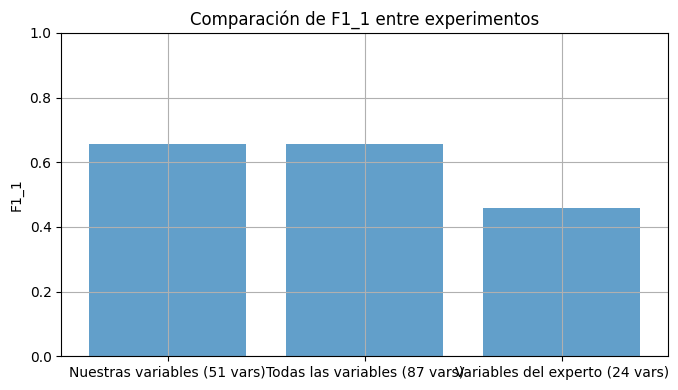

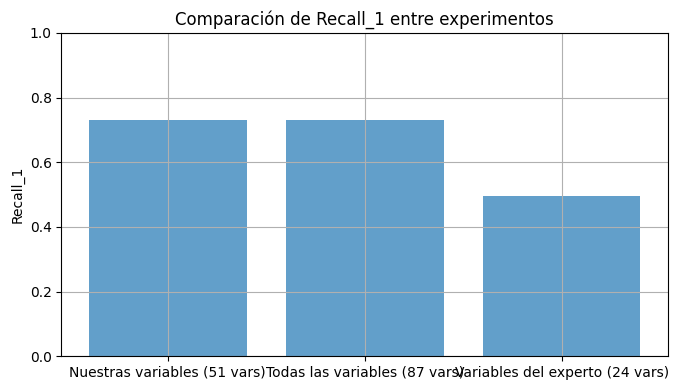

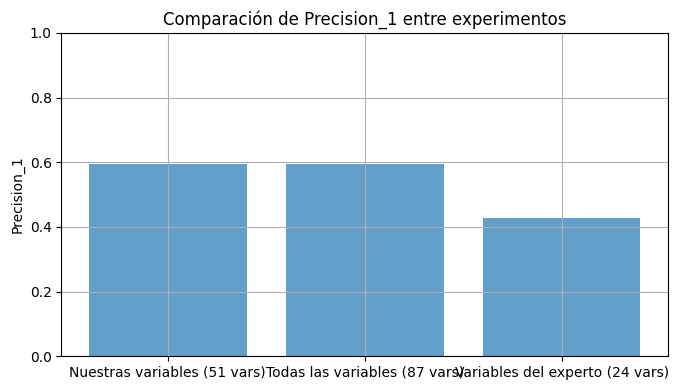

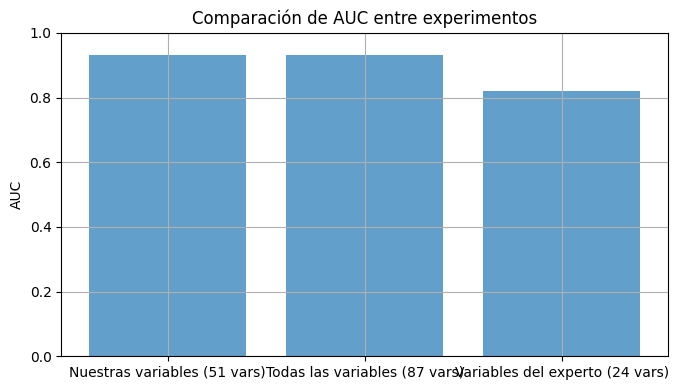

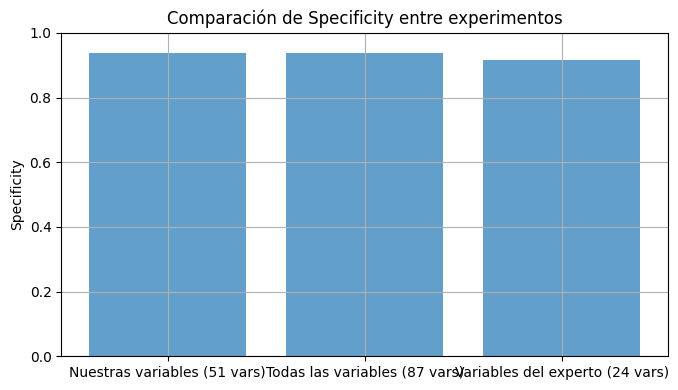

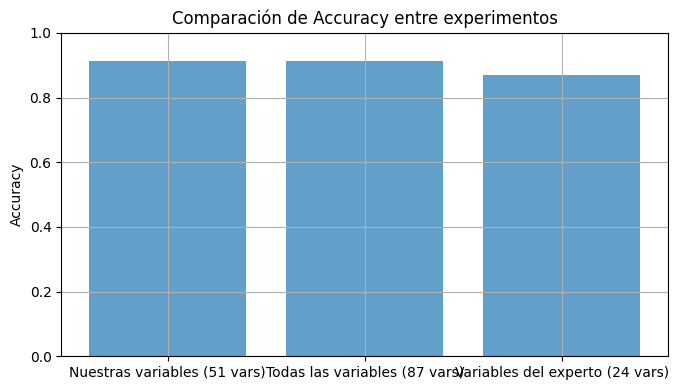

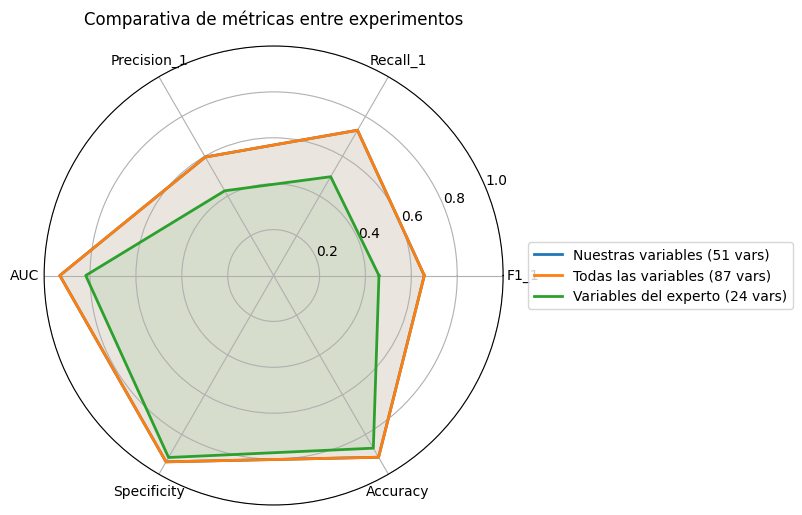

In [ ]:
# Cargar los datasets
df_mio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_model.csv')
df_all = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_model_all.csv')
df_expert = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/expert_train_df_model_coded.csv')

# Obtener número de variables (excluyendo columna objetivo si aplica)
n_vars_mio = df_mio.shape[1] - 1  # Suponiendo que hay una columna objetivo
n_vars_all = df_all.shape[1] - 1
n_vars_expert = df_expert.shape[1] - 1

# Ejecutar experimentos
resultados = []
resultados.append(entrenar_y_evaluar_modelo(df_mio, 'Nuestras variables'))
resultados.append(entrenar_y_evaluar_modelo(df_all, 'Todas las variables'))
resultados.append(entrenar_y_evaluar_modelo(df_expert, 'Variables del experto'))

# Crear DataFrame de resultados
results_df = pd.DataFrame(resultados)

# Añadir número de variables al nombre del dataset
results_df['Variables'] = [n_vars_mio, n_vars_all, n_vars_expert]
results_df['Dataset'] = results_df['Dataset'] + ' (' + results_df['Variables'].astype(str) + ' vars)'

# 🔍 Gráfica comparativa de métricas
metricas_clase1 = ['F1_1', 'Recall_1', 'Precision_1', 'AUC', 'Specificity', 'Accuracy']

for metrica in metricas_clase1:
    plt.figure(figsize=(7, 4))
    plt.bar(results_df['Dataset'], results_df[metrica], alpha=0.7)
    plt.ylabel(metrica)
    plt.title(f'Comparación de {metrica} entre experimentos')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Gráfico radar comparativo (Nuestras / Todas / Experto) ===
labels = metricas_clase1  # ['F1_1', 'Recall_1', 'Precision_1', 'AUC', 'Specificity', 'Accuracy']

# Ángulos del radar
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, [angles[0]]])  # cerrar el polígono

fig = plt.figure(figsize=(6.8, 6.8))
ax = plt.subplot(111, polar=True)

# Dibujar cada experimento
for _, row in results_df.iterrows():
    vals = row[labels].astype(float).values
    vals = np.clip(vals, 0, 1)  # por si acaso
    vals = np.concatenate([vals, [vals[0]]])
    ax.plot(angles, vals, linewidth=2, label=row['Dataset'])
    ax.fill(angles, vals, alpha=0.10)

# Ejes y estética
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1.0)
ax.set_title('Comparativa de métricas entre experimentos', pad=16)

ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), frameon=True)

fig.subplots_adjust(right=0.80, top=0.90)

plt.show()
